In [ ]:
! pip install mediapipe

In [1]:
import cv2 #to read and process images
import matplotlib.pyplot as plt #to show resultant images 
import mediapipe as mp

# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose
# Setting up the Pose model for images.
pose_img = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
# Setting up the Pose model for videos.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5, model_complexity=1)

# Initializing mediapipe drawing class to draw landmarks on specified image.
mp_drawing = mp.solutions.drawing_utils

In [3]:
import math
# Calculate the 2D angle between three points
def calcul_angle2D(point1, point2, point3):
    x1, y1, _ = point1
    x2, y2, _ = point2
    x3, y3, _ = point3
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    return angle

In [4]:
def estimPose_img(input_file, pose=pose_img, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                   thickness=20, circle_r=10, display=True):
    
    # Read the input image
    if isinstance(input_file, str) :
        input_img = cv2.imread(input_file)
    else :
        input_img = input_file
    
    # Create a copy of the input image
    output_img = input_img.copy()
    
    # Convert the image from BGR into RGB format.
    RGB_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(RGB_img)
    
    # Retrieve the height and width of the input image.
    height, width, _ = input_img.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(output_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if we want to display.
    if display:
        # Display the original input image and the resulting image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(input_img[:,:,::-1]);plt.title("Original image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_img[:,:,::-1]);plt.title("Output image");plt.axis('off');
        
        # Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Just get output_img and landmarks
    else:
        # Return the output image and the found landmarks.
        return output_img, landmarks

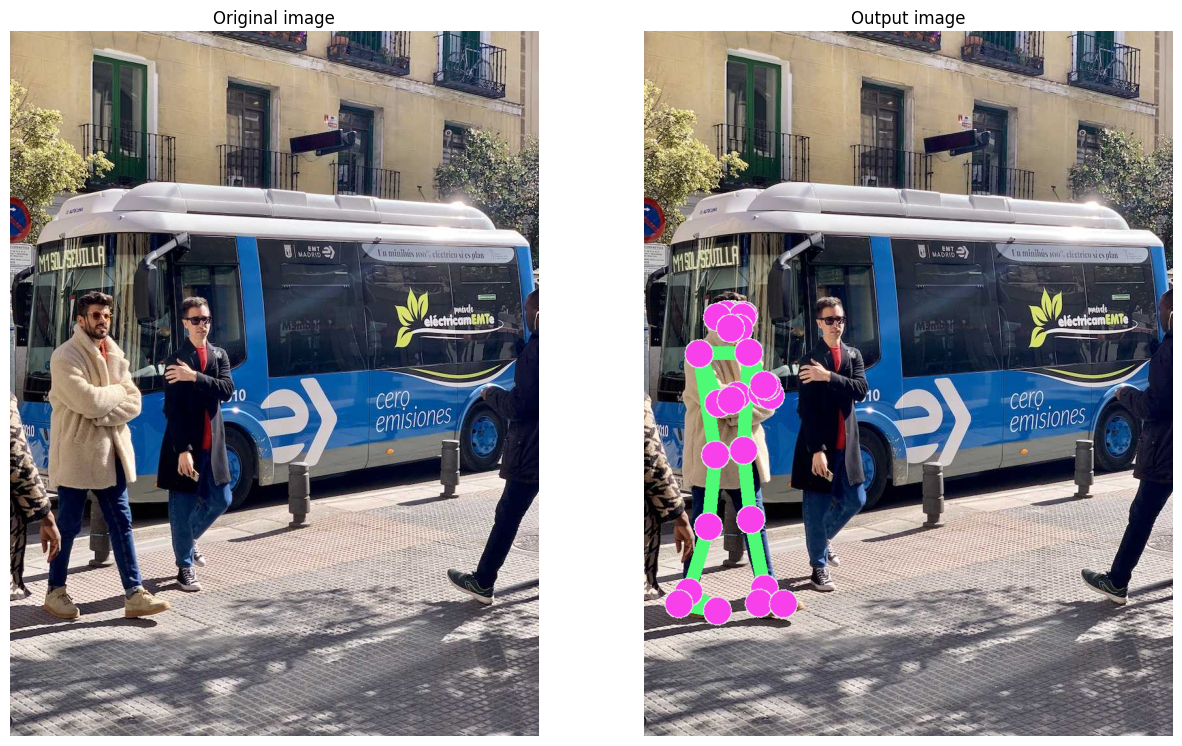

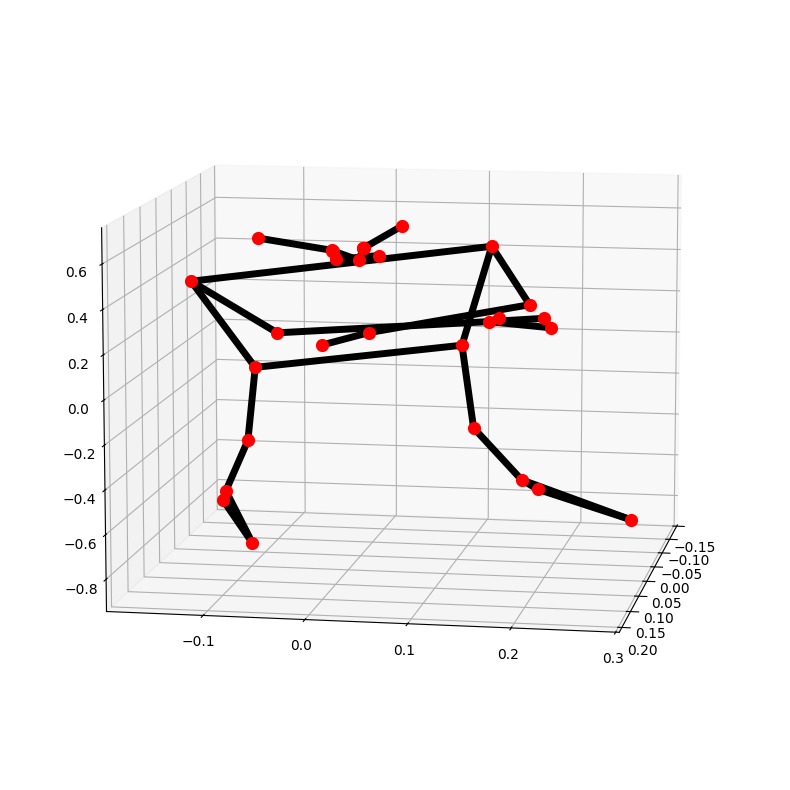

In [5]:
estimPose_img(r'Input\bus.jpg')

In [6]:

def estimPose_video(input_file, pose_video=pose_video, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                 thickness=5, circle_r=5, display=True, nrows_frames=4, ncols_frames=3):
    
    # Initialize the VideoCapture object to read from a video stored in the disk.
    video = cv2.VideoCapture(input_file)
    
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    
    for i in range(total_frames):
        # Read a frame.
        ok, frame = video.read()
    
        # Check if frame is not read properly.
        if not ok:
            # Break the loop.
            break
        
        # Get the width and height of the frame
        frame_height, frame_width, _ =  frame.shape
        # Resize the frame while keeping the aspect ratio.
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        frame, _ = estimPose_img(frame, pose_video, landmarks_c, connection_c, thickness, 
                              circle_r, display=False)
    
        frames.append(frame)
    
    if display :
        fig, axarr = plt.subplots(nrows_frames,ncols_frames,figsize=[15, 15])
        k=0
        for i in range(nrows_frames):
            for j in range(ncols_frames):
                axarr[i,j].imshow(frames[k][:,:,::-1]);axarr[i,j].axis('off')
                k+=1
    else:
        return frames

In [7]:
estimPose_video(r'Input\Test Input Videos\MarchingTo100BPM.mp4')

KeyboardInterrupt: 

In [8]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instanceaaaaaaaaaa
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detectiaaaons
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
def launchMarch():
    landmarks = []

    cap = cv2.VideoCapture(0)
    ## Setup mediapipe instance
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
        
            # Make detection
            results = pose.process(image)
        
            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
            # Extract landmarks
            try:
                landmarks.append(results.pose_landmarks.landmark)
                print(landmarks[len(landmarks) - 1])
            except:
                pass
            
            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )               
            
            cv2.imshow('Mediapipe Feed', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

[x: 0.698987722
y: 0.752598763
z: -0.936409831
visibility: 0.998560488
, x: 0.722105861
y: 0.678034663
z: -0.904068112
visibility: 0.997421861
, x: 0.739046037
y: 0.677987099
z: -0.90406245
visibility: 0.996863484
, x: 0.754661
y: 0.677367806
z: -0.90452373
visibility: 0.997356296
, x: 0.672287285
y: 0.665972471
z: -0.926688373
visibility: 0.998294175
, x: 0.651011467
y: 0.659211576
z: -0.925723851
visibility: 0.99786526
, x: 0.62790525
y: 0.654094696
z: -0.925812602
visibility: 0.998170614
, x: 0.761891365
y: 0.678143919
z: -0.51972276
visibility: 0.996914744
, x: 0.563661397
y: 0.661604524
z: -0.585295
visibility: 0.998622656
, x: 0.707623482
y: 0.81394
z: -0.774791718
visibility: 0.999147058
, x: 0.65099287
y: 0.813254952
z: -0.792987883
visibility: 0.999455392
, x: 0.859392941
y: 0.930472136
z: -0.256014109
visibility: 0.997973
, x: 0.388165951
y: 0.978114963
z: -0.352280021
visibility: 0.998019814
, x: 1.01504076
y: 1.27082705
z: -0.196148396
visibility: 0.183940068
, x: 0.335424


In [24]:
%pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [51]:


import simpleaudio, time 
strong_beat = simpleaudio.WaveObject.from_wave_file('strong_beat.wav')

while True:
    beginBeatTime = time.time()
    strong_beat.play()
    print("time per run: " , time.time() - beginBeatTime)
    time.sleep(0.5)
    # beats 2 times a second therefore 120 bpm

time per run:  0.09511899948120117
time per run:  0.0426182746887207
time per run:  0.048243045806884766
time per run:  0.054384708404541016
time per run:  0.04154491424560547
time per run:  0.04213428497314453
time per run:  0.06035971641540527
time per run:  0.05886220932006836
time per run:  0.05103635787963867
time per run:  0.05393362045288086
time per run:  0.057979583740234375
time per run:  0.04640388488769531
time per run:  0.04633331298828125
time per run:  0.0553431510925293
time per run:  0.06895637512207031
time per run:  0.05358600616455078
time per run:  0.04521441459655762
time per run:  0.07093000411987305
time per run:  0.05072617530822754
time per run:  0.03981184959411621
time per run:  0.04664969444274902
time per run:  0.04469585418701172
time per run:  0.04191446304321289
time per run:  0.04024386405944824
time per run:  0.05642271041870117
time per run:  0.04589247703552246
time per run:  0.04034066200256348
time per run:  0.0866556167602539
time per run:  0.046

KeyboardInterrupt: 

In [45]:


import simpleaudio, time 
def playBPM(beatsPerMin):
    beatsPerSec = beatsPerMin/60
    strong_beat = simpleaudio.WaveObject.from_wave_file('strong_beat.wav')
    while True:
        strong_beat.play()
        time.sleep(beatsPerSec**-1)
        # beats 2 times a second therefore 120 bpm
playBPM(120)

KeyboardInterrupt: 